### ***Initializing and Importing Packages***

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from sklearn import preprocessing
import os
import networkx as nx
import seaborn as sns
import math

import Funcs

# sns.color_palette("Set2")
sns.set_theme()
# # For the image quality of the graphic. 
sns.set(rc={"figure.dpi":500})
# # For the size of the graphics
# sns.set(rc = {"figure.figsize":(4,4)})
#sns.set(font_scale = 0.5)

DataDir = "../../../Data/"
FigsDir = "../../../Figs/"




In [26]:
DataDir = DataDir + 'Raw-Data/AlphaVantage/15min-Data'
symboles, markets, cryptos= Funcs.PrepDataNames(DataDir)

#### ***Plotting the Returns*** 

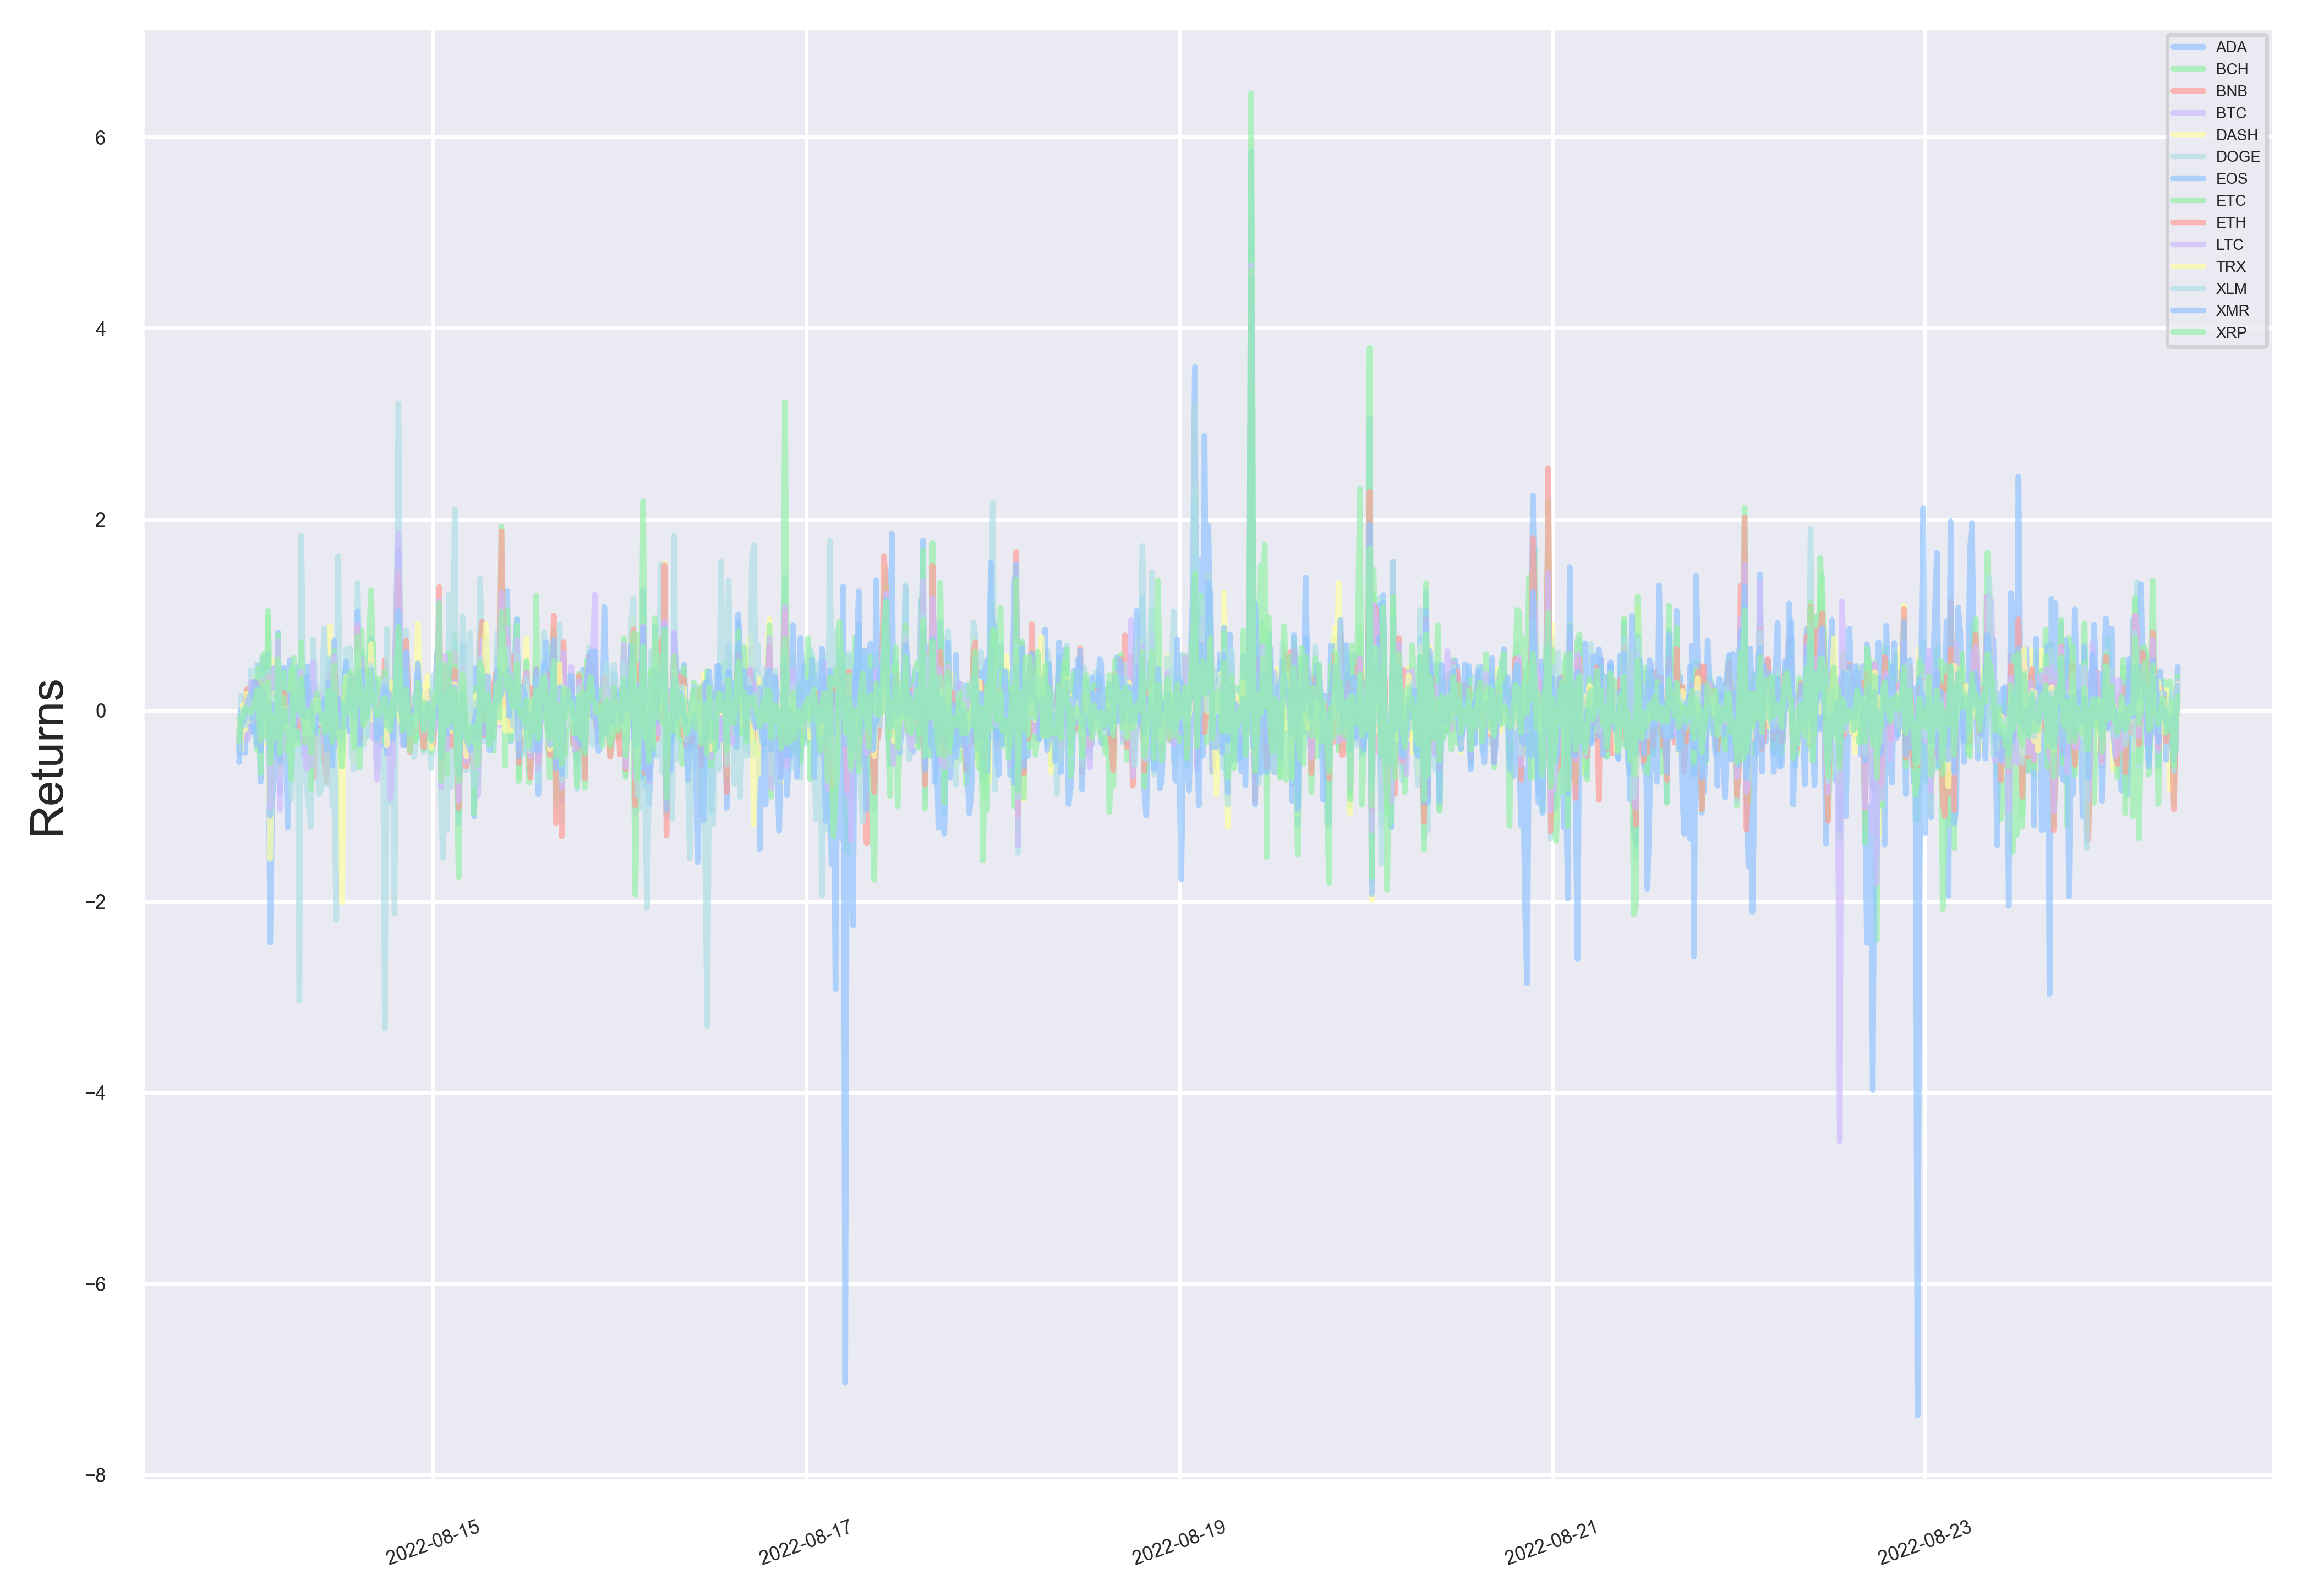

In [27]:
#Minutly Returns of coins in US Market
ReturnDict= Funcs.LoadData(DataDir, symboles, markets, cryptos)
ReturnDF_Time= pd.DataFrame.from_dict(ReturnDict['Timestamp'])
ReturnDF_USD = pd.DataFrame.from_dict(ReturnDict['USD'])
plt.style.use('seaborn-pastel')
plt.figure(figsize = (10,7))
for crypto in cryptos:
    plt.plot(ReturnDF_Time, ReturnDF_USD['%s' % crypto], label = '%s' % crypto, alpha = 0.7)

plt.xticks(rotation=20, fontsize = 5)
plt.yticks(fontsize = 5)
plt.ylabel('Returns')
plt.legend(loc=1, prop={'size': 4})
plt.savefig(FigsDir + 'Stationarity-15min-USDmarket.pdf', bbox_inches='tight')
plt.show()

### ***The Eddy-Fuller test***

In [8]:
Funcs.Eddy_Fuller_test(ReturnDF_USD, cryptos)

p-value (ADA) = 0.0 
p-value (BCH) = 1.1031948106402074e-28 
p-value (BNB) = 0.0 
p-value (BTC) = 8.220178396092641e-25 
p-value (DASH) = 7.788190789203972e-17 
p-value (DOGE) = 0.0 
p-value (EOS) = 0.0 
p-value (ETC) = 1.0634100991239234e-25 
p-value (ETH) = 0.0 
p-value (LTC) = 0.0 
p-value (TRX) = 5.4415764740998084e-30 
p-value (XLM) = 0.0 
p-value (XMR) = 0.0 
p-value (XRP) = 0.0 


### ***Optimum Lag***

In [9]:
maxlag_ = 12
Funcs.Optimum_lag(ReturnDF_USD,maxlag_)

,AIC,BIC,FPE,HQIC
0,-38.04*,-37.97*,3.029e-17*,-38.01*
1,-37.95,-36.91,3.300e-17,-37.55
2,-37.82,-35.80,3.770e-17,-37.05
3,-37.68,-34.69,4.343e-17,-36.54
4,-37.53,-33.57,5.032e-17,-36.02
5,-37.34,-32.41,6.107e-17,-35.46
6,-37.14,-31.24,7.474e-17,-34.89
7,-37.01,-30.13,8.565e-17,-34.39
8,-36.85,-29.01,1.002e-16,-33.87
9,-36.72,-27.90,1.154e-16,-33.36


### ***Granger-Cause Test***

In [35]:
maxlag_ = 4
P_val_Dataframe, F_val_Dataframe = Funcs.grangers_causation_matrix(ReturnDF_USD, maxlag_, variables=ReturnDF_USD.columns)


In [36]:
F_val_Dataframe #the dataframe consisting of the F scores for lag = 4

,ADA_x,BCH_x,BNB_x,BTC_x,DASH_x,DOGE_x,EOS_x,ETC_x,ETH_x,LTC_x,TRX_x,XLM_x,XMR_x,XRP_x
ADA_y,0.0000,0.8370,0.4714,2.2161,0.0401,0.1989,0.3850,0.3770,1.3346,0.6694,1.9097,0.8915,2.2518,0.4414
BCH_y,2.4470,0.0000,4.4179,1.0689,0.9605,1.6765,0.2792,1.4219,1.2714,0.6390,2.9688,0.4457,2.1710,2.4252
BNB_y,0.6445,0.4427,0.0000,1.4189,0.9006,0.6212,0.2333,0.4337,1.0409,0.4390,1.9754,1.6109,1.2490,0.3975
BTC_y,3.9656,3.0415,4.0529,0.0000,3.4315,1.8872,0.4125,2.5180,2.5627,3.1058,3.8676,1.5546,2.7616,1.3596
DASH_y,0.4891,2.3067,0.1760,3.2505,0.0000,0.9653,0.3056,0.4771,1.5521,0.6485,3.1323,2.1512,1.0000,0.2775
DOGE_y,1.0207,0.2520,1.9188,0.5411,0.4127,0.0000,1.0401,0.5834,0.7967,0.7788,1.3923,0.1895,1.5441,1.1701
EOS_y,2.9987,2.9789,2.1795,2.2093,2.8493,1.4409,0.0000,2.4710,2.2032,2.6484,2.3132,0.7562,1.6481,1.8834
ETC_y,1.9236,0.5552,1.6593,1.2343,0.3175,0.3302,0.6120,0.0000,1.6604,0.3450,1.8302,0.9086,4.2808,0.6184
ETH_y,3.3084,1.7879,4.4572,1.4206,1.7596,1.5228,0.5733,1.2352,0.0000,1.5426,3.6124,1.8660,1.2783,0.6927
LTC_y,0.4264,1.8278,0.3838,1.6517,0.8052,0.4610,0.8427,0.3511,1.4910,0.0000,2.5761,1.6824,0.9686,0.4910


In [37]:
P_val_Dataframe #the dataframe consisting the minimum p-values

,ADA_x,BCH_x,BNB_x,BTC_x,DASH_x,DOGE_x,EOS_x,ETC_x,ETH_x,LTC_x,TRX_x,XLM_x,XMR_x,XRP_x
ADA_y,1.0000,0.2110,0.6488,0.0625,0.8256,0.6211,0.6219,0.4641,0.2498,0.3045,0.0191,0.2169,0.0145,0.7758
BCH_y,0.0425,1.0000,0.0013,0.2893,0.4229,0.1487,0.7386,0.2195,0.0714,0.4754,0.0175,0.7726,0.0310,0.0221
BNB_y,0.6265,0.2886,1.0000,0.2075,0.1486,0.3110,0.6937,0.2586,0.2705,0.4203,0.0405,0.0710,0.2097,0.8028
BTC_y,0.0030,0.0154,0.0026,1.0000,0.0078,0.1066,0.6916,0.0378,0.0287,0.0138,0.0036,0.1795,0.0172,0.1642
DASH_y,0.4562,0.0358,0.7732,0.0107,1.0000,0.1484,0.5703,0.2483,0.1802,0.1771,0.0102,0.0547,0.1469,0.8835
DOGE_y,0.3900,0.8670,0.0376,0.1989,0.7255,1.0000,0.2721,0.2454,0.0859,0.2006,0.2294,0.9431,0.0886,0.0560
EOS_y,0.0166,0.0170,0.0334,0.0632,0.0215,0.2133,1.0000,0.0409,0.0638,0.0303,0.0532,0.5491,0.0909,0.1073
ETC_y,0.0235,0.4903,0.0229,0.1733,0.2779,0.7525,0.1308,1.0000,0.0791,0.2663,0.0338,0.2965,0.0007,0.1398
ETH_y,0.0097,0.0708,0.0012,0.1583,0.1306,0.1884,0.5124,0.2887,1.0000,0.1828,0.0057,0.0435,0.2144,0.4400
LTC_y,0.7869,0.0584,0.5975,0.1162,0.2512,0.2945,0.4930,0.4928,0.1826,1.0000,0.0211,0.0624,0.2242,0.3940


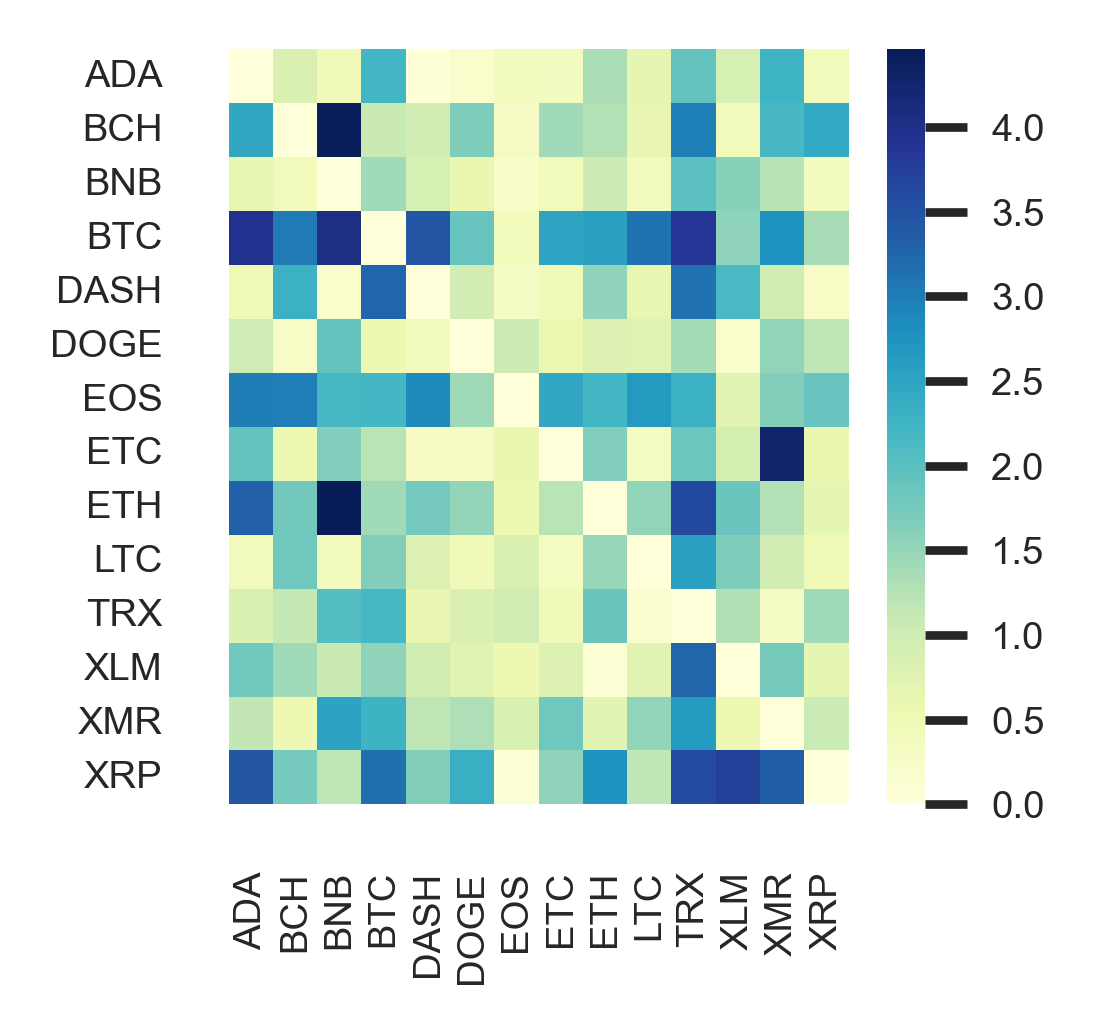

In [44]:
#'Heatmap Plots for Granger-Causality Test Results,'
#F-scores
sns.set(font_scale = 0.5)
plt.figure(figsize = (2,2))
sns.heatmap(F_val_Dataframe, annot = False, cmap="YlGnBu",xticklabels=cryptos, yticklabels=cryptos , cbar = True)
#plt.subplots_adjust(top=0.8)
#plt.savefig(FigsDir + "GrangerCauseFvalues-15min-USDmarket.jpg", bbox_inches='tight')


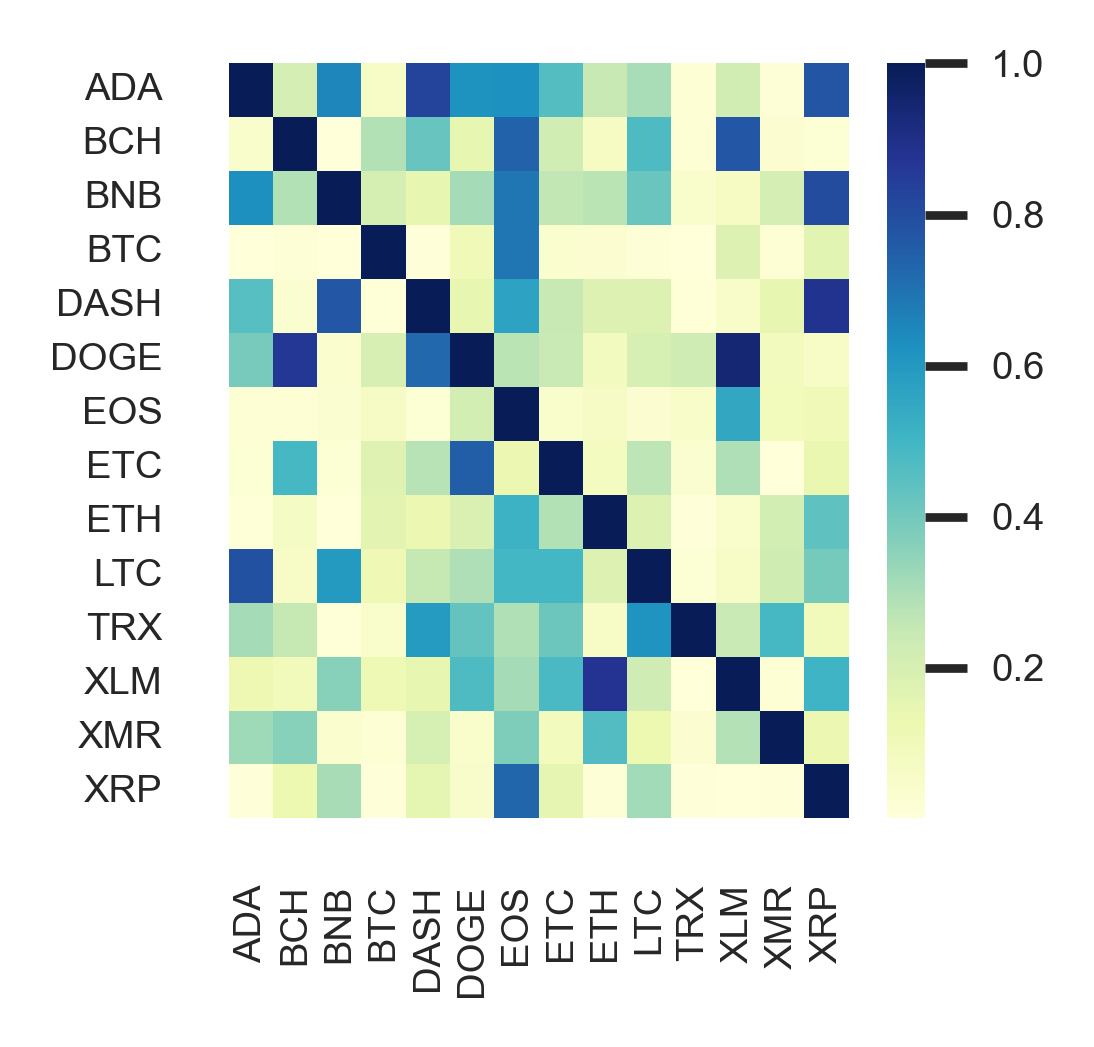

In [46]:
#'Heatmap Plots for Granger-Causality Test Results,'
#P-values
plt.figure(figsize = (2,2))
sns.heatmap(P_val_Dataframe, annot = False, cmap="YlGnBu", xticklabels=cryptos, yticklabels=cryptos , cbar = True )
#plt.subplots_adjust(top=0.8)
#plt.savefig(FigsDir + "GrangerCausePvalues-15min-USDmarket.jpg", bbox_inches='tight')

### ***Graph***

In [ ]:
G_.edges(data=True)

In [185]:

def ScaleData(Dataframe):
    #Mat = np.array(Dataframe)
    scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
    Mat = scaler.fit_transform(Dataframe)
    #Mat = 2 * (Mat - Mat.min()) / (Mat.max() - Mat.min()) -1
    # for i in range(len(Mat)):
    #     for j in range(len(Mat)):
    #         Mat[i,j] = round(Mat[i,j] , 1)
    # for i in range(len(Mat)):
    #     Mat[i,i] = 0.0
    return Mat

In [212]:
def CalculateDistance(c) : 
    return np.multiply(np.subtract(1, c), math.sqrt(2))
def nudge(pos, x_shift, y_shift):
    return {n:(x + x_shift, y + y_shift) for n,(x,y) in pos.items()}
Matrix_F = np.array(F_val_Dataframe)
# Matrix_FF = ScaleData(Matrix_F)
# Mat = CalculateDistance(Matrix_FF)
#MAT = CalculateDistance(ScaleData(F_val_Dataframe))


#G_ = nx.from_numpy_array(Mat) #Gives the adjacency array

In [213]:
Mat = Matrix_F
thresh = 3.1
for i in range(len(cryptos)):
    for j in range(len(cryptos)):
        if Mat[i,j] > thresh:
            Mat[i,j] = 1
        else:
            Mat[i,j] = 0


In [214]:
G_ = nx.from_numpy_array(Mat) #Gives the adjacency array

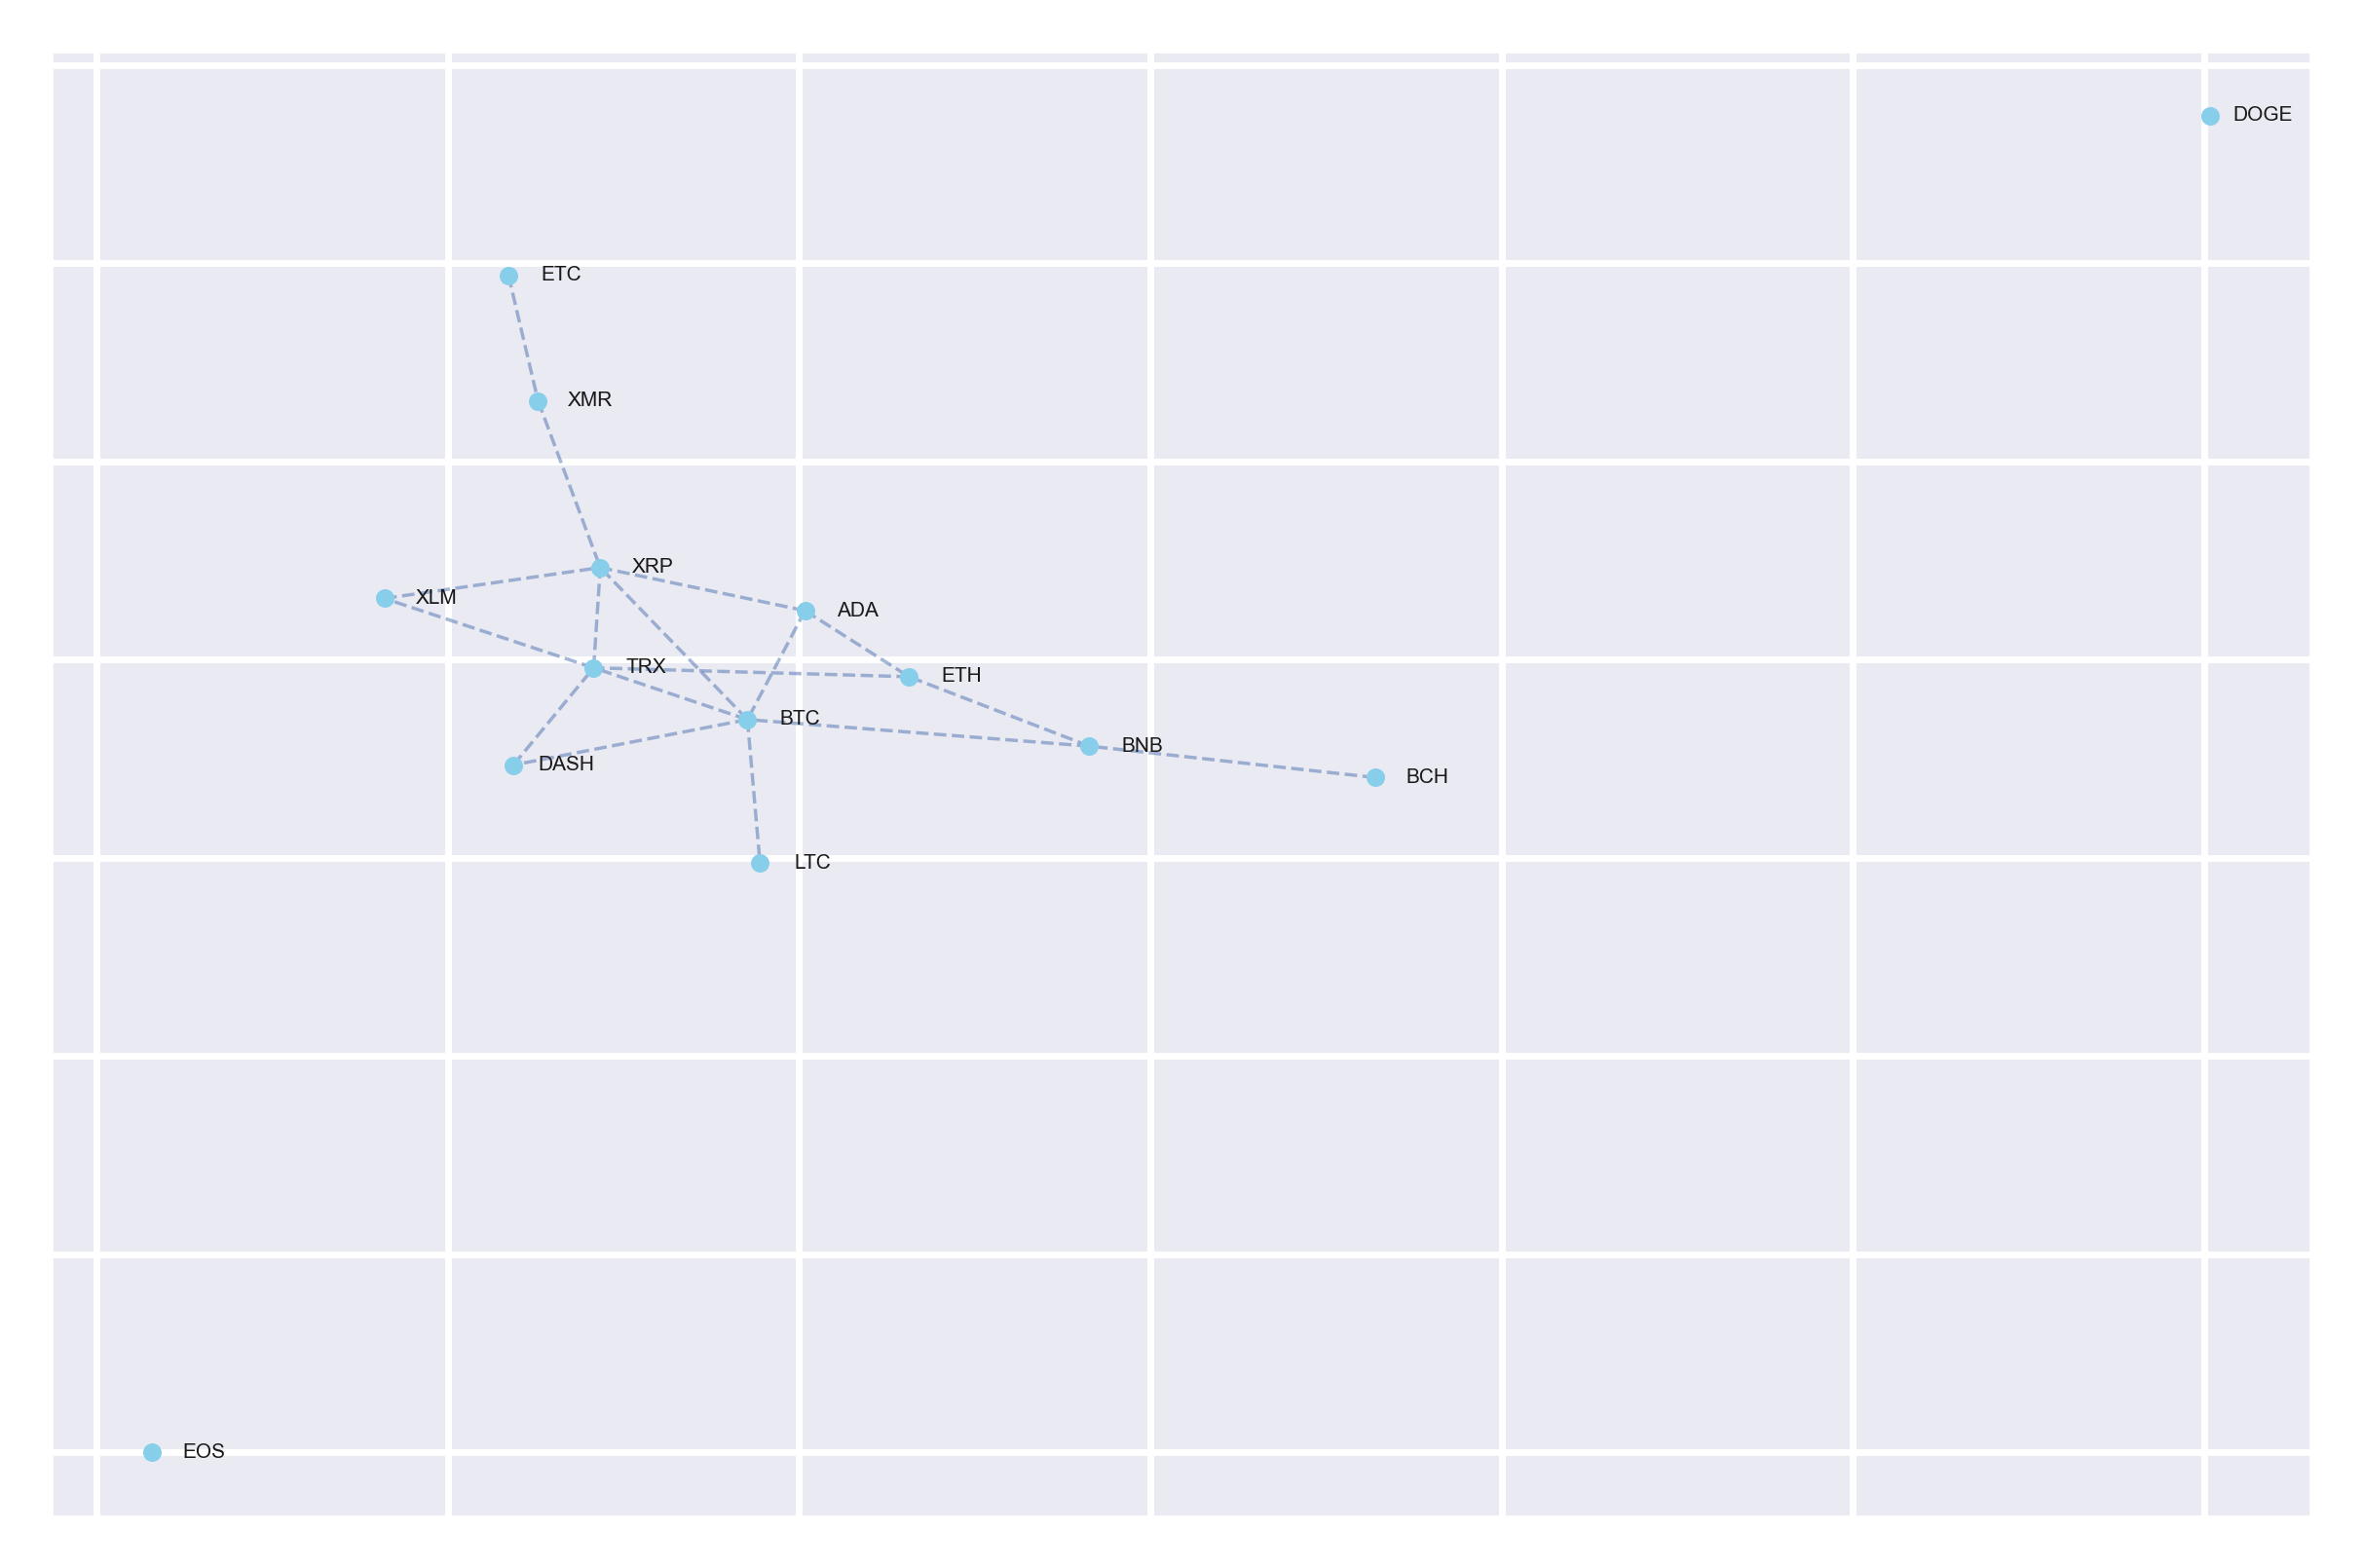

In [215]:
#G = nx.minimum_spanning_tree(G_, algorithm = 'prim')


labels={}
for i in range(len(G_.nodes())):
    labels[list(G_.nodes)[i]] = cryptos[i]   
H = nx.relabel_nodes(G_, labels)
# remove_nodes_list = ['DOGE', 'ETC', 'XMR', 'DASH', 'EOS', 'LTC']
# for i in remove_nodes_list:
#     H.remove_node("%s" %i)


pos = nx.spring_layout(H, seed=7, weight='length')
pos_nodes = nudge(pos, 0.03, 0)  

weight_labels = nx.get_edge_attributes(H,'weight')
# elarge = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] > 0.5]
# esmall = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] <= 0.5]
#, edgelist=esmall
#node_size = [v * 10 for v in d.values()]
d = dict(H.degree)
nx.draw_networkx_nodes(H, pos, node_size = 3 , node_color="skyblue")
nx.draw_networkx_labels(H, pos_nodes, font_size=3, font_family="sans-serif")
#nx.draw_networkx_edges(H, pos, width=0.5)
nx.draw_networkx_edges(
    H, pos, width=0.5, alpha=0.5, edge_color="b", style="dashed")


#plt.savefig('F_values_MSTgraph.jpg')


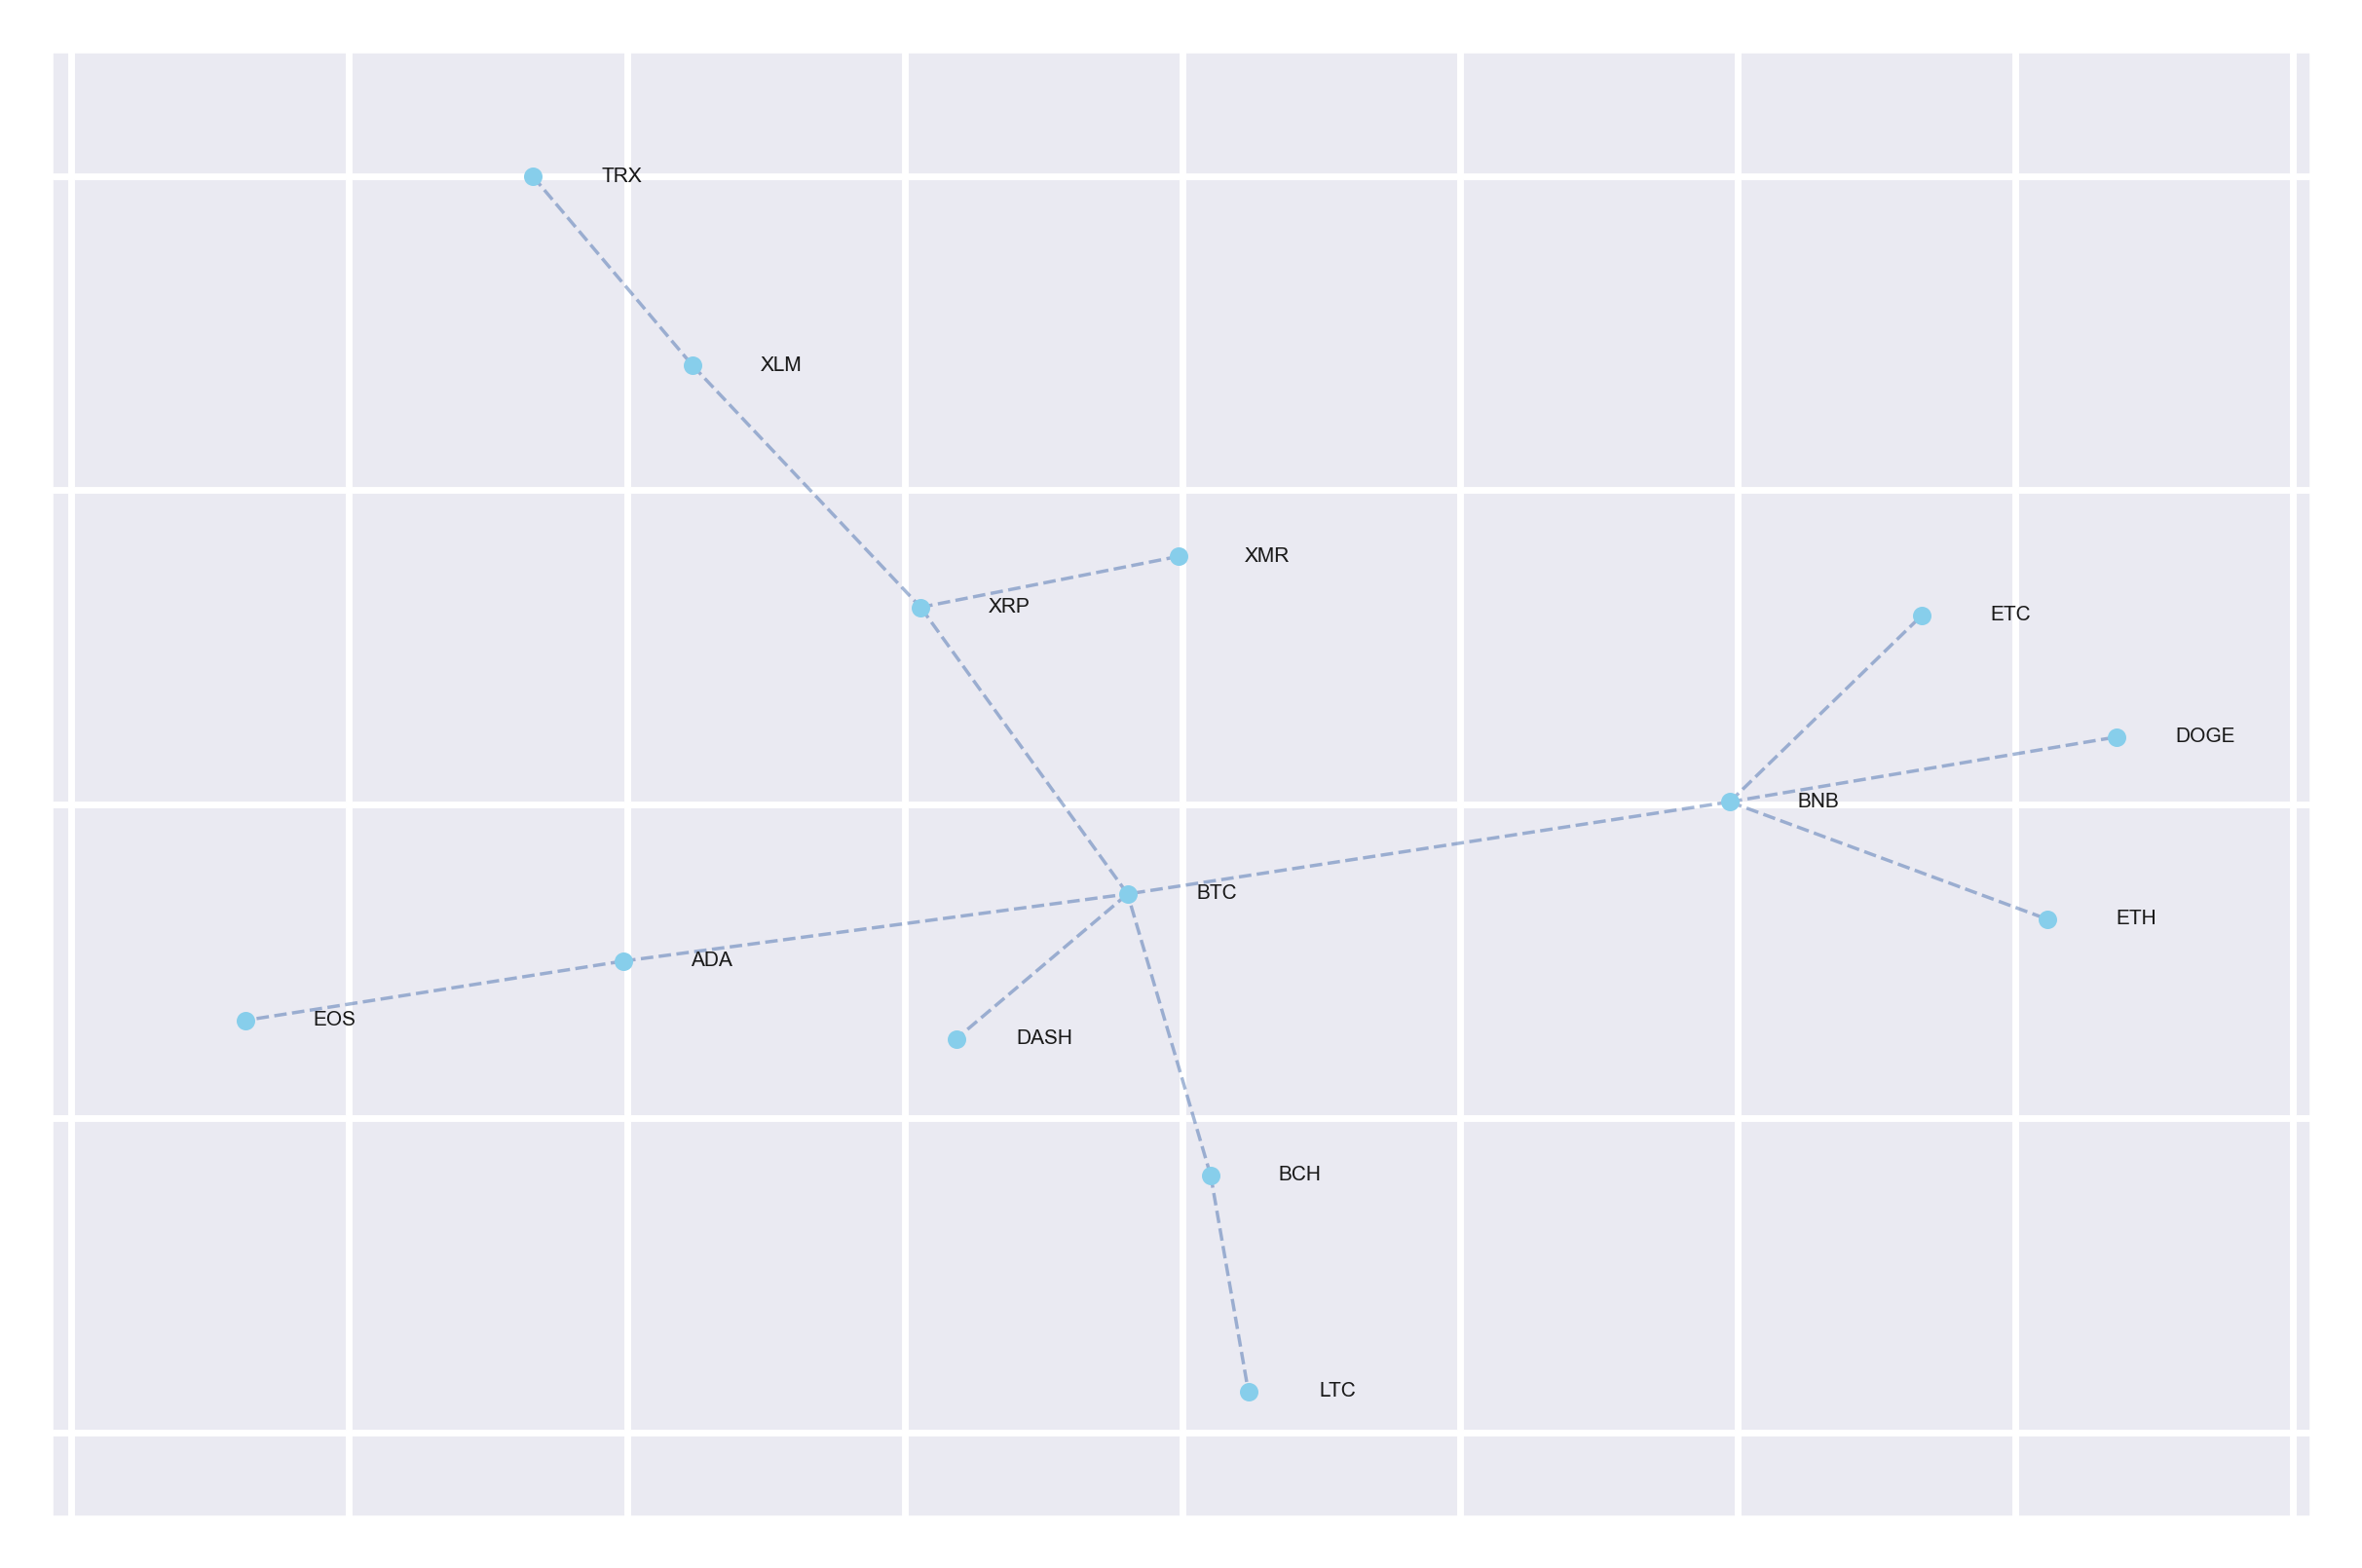

In [66]:
#The Minimum Spanning Tree Graph based on the P values
P_MAT = np.array(P_val_Dataframe)
Funcs.MST_Graph(P_MAT, cryptos)
#plt.savefig(FigsDir + 'Pvalues-MSTgraph-15min-USDmarket.jpg')

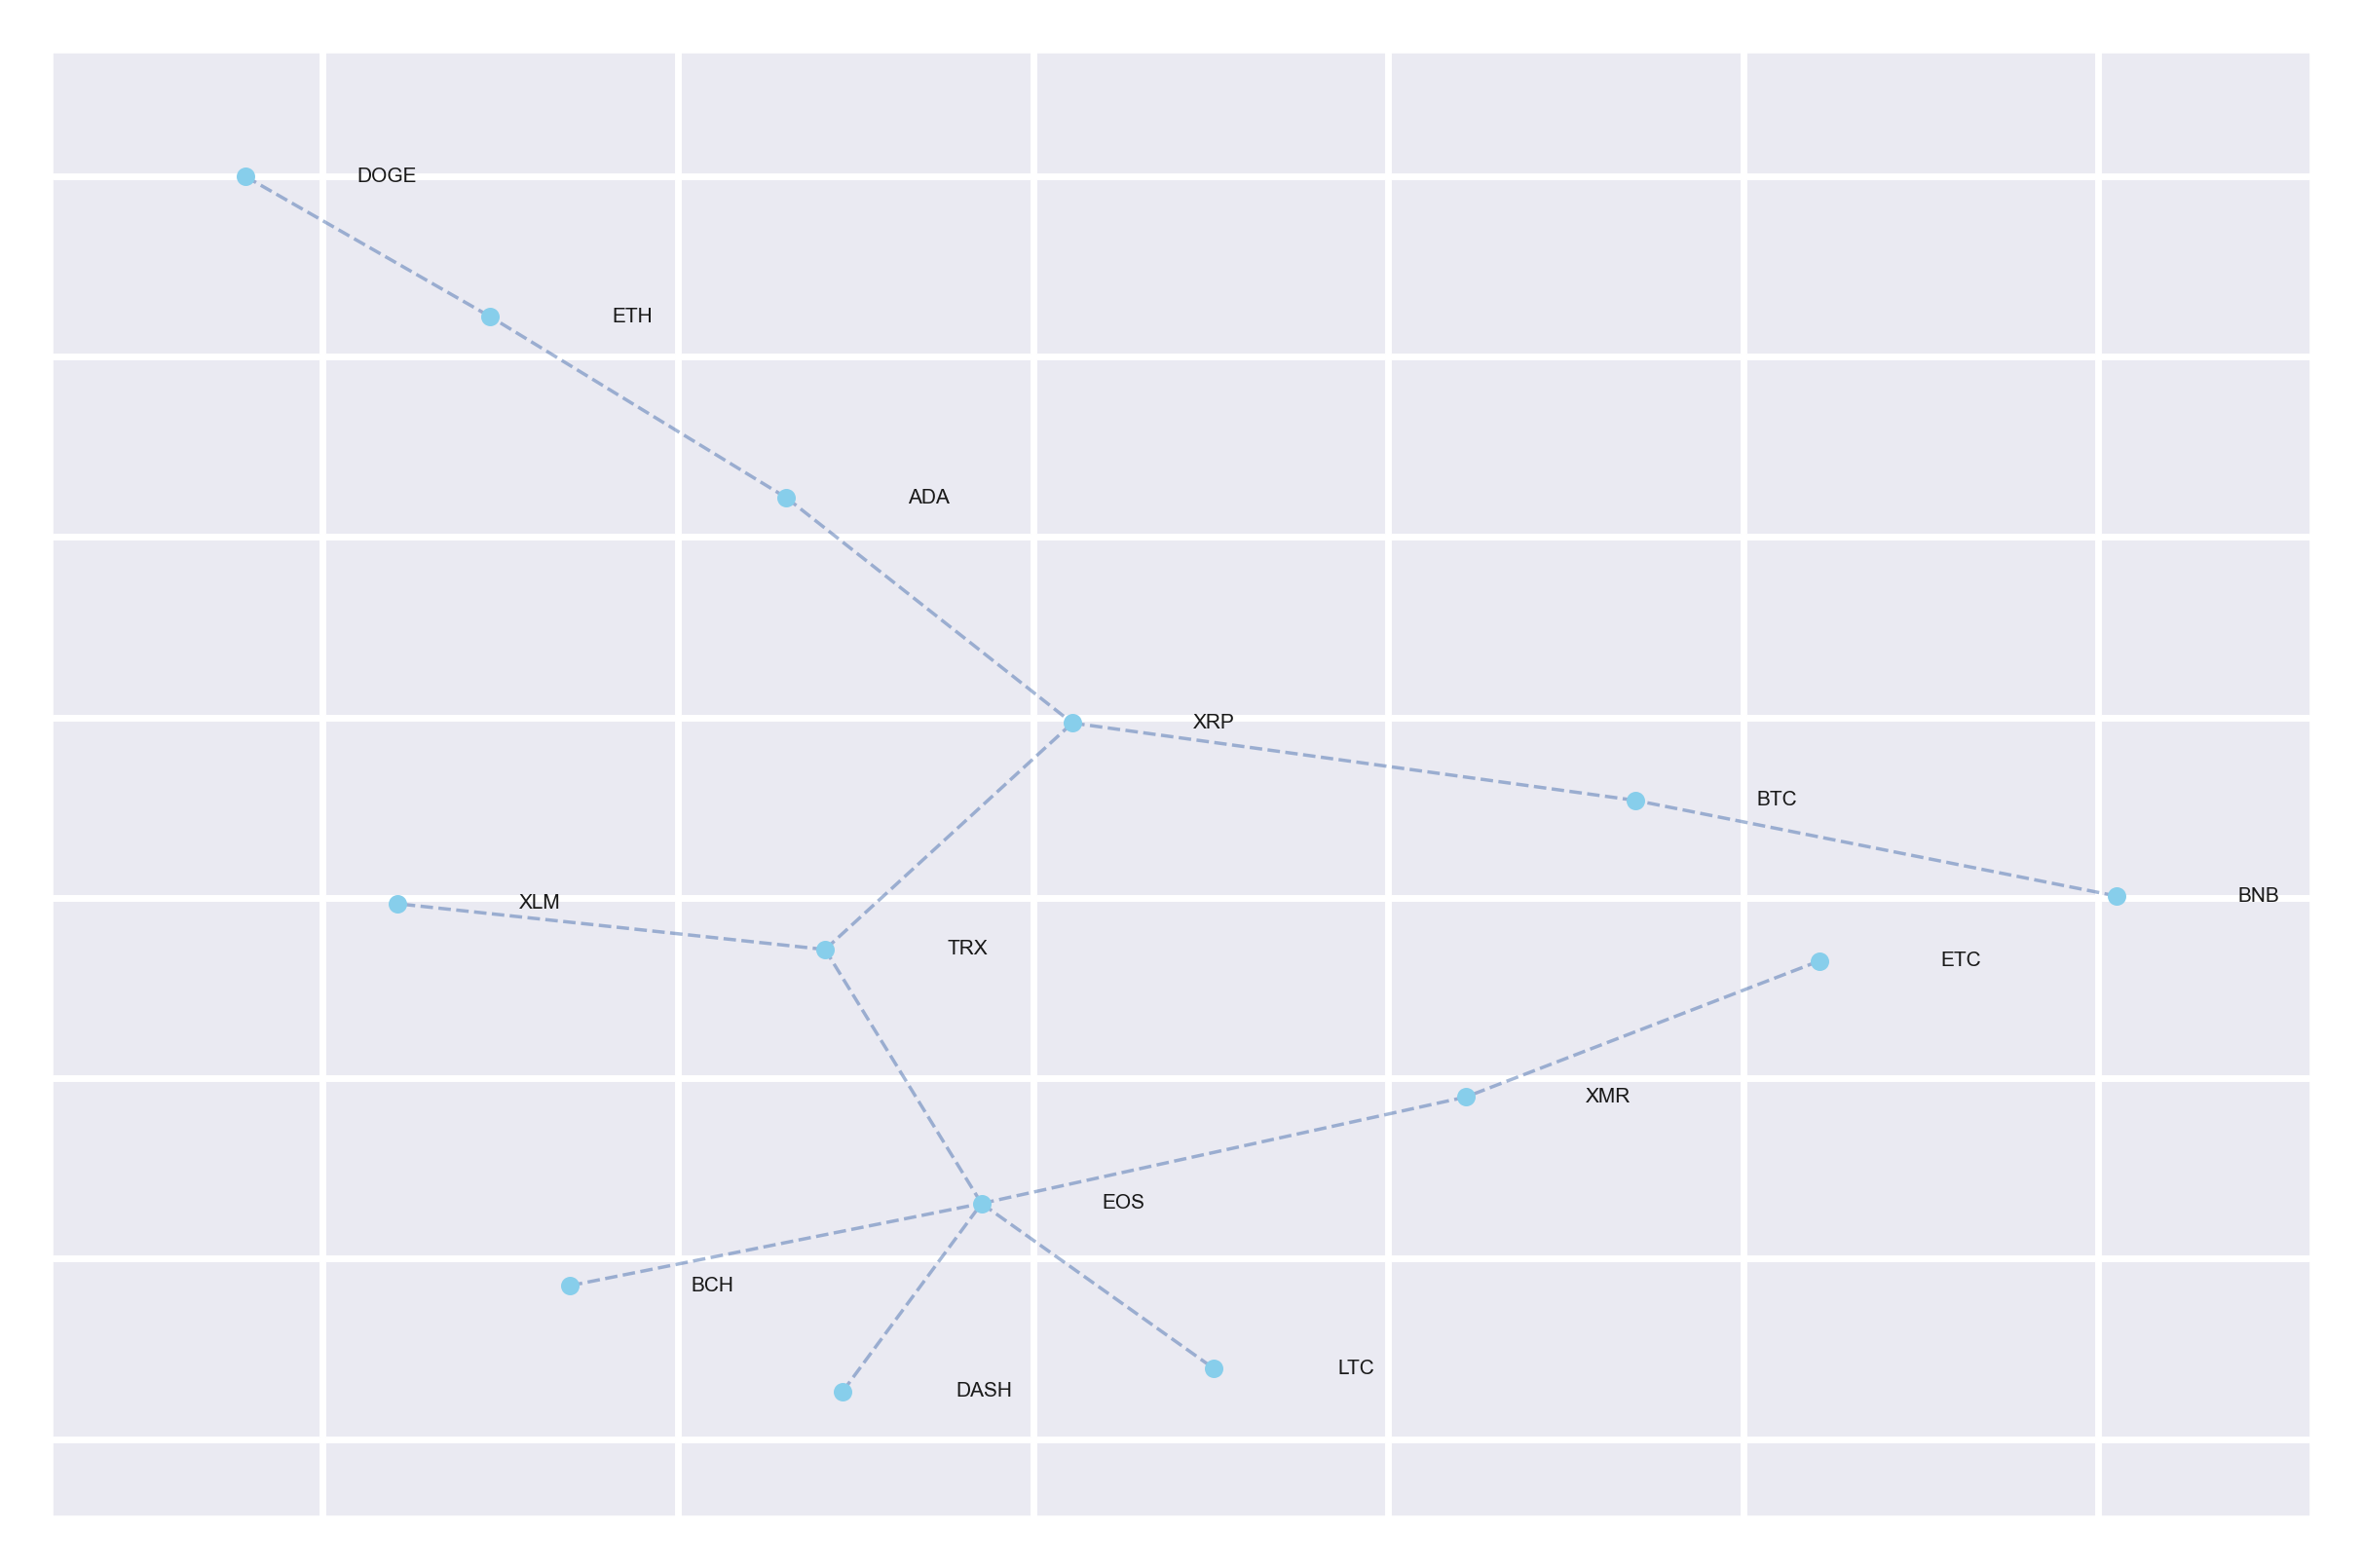

In [42]:
#The Minimum Spanning Tree Graph based on the F-scores
F_MAT = Funcs.CalculateDistance(Funcs.ScaleData(np.array(F_val_Dataframe)))
Funcs.MST_Graph(F_MAT, cryptos)